In [44]:
import cv2
from matplotlib import pyplot as plt
from skimage import exposure,util
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

df = pd.read_pickle("C:/Users/juanr/Documents/data_mediciones/defects/defects_df_0_2dt_binth15_1x1iters.pkl")
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23030 entries, 0 to 115
Data columns (total 10 columns):
label                  23030 non-null int32
area                   23030 non-null float64
convex_area            23030 non-null float64
filled_area            23030 non-null float64
major_axis_length      23030 non-null float64
minor_axis_length      23030 non-null float64
perimeter              23030 non-null float64
equivalent_diameter    23030 non-null float64
extent                 23030 non-null float64
img                    23030 non-null int64
dtypes: float64(8), int32(1), int64(1)
memory usage: 1.8 MB


(None, (23030, 10))

In [2]:
df.head()

,label,area,convex_area,filled_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,extent,img
0,10,796630.301164,799581.102992,799581.102992,1297.923978,820.857221,5600.580229,1007.125217,0.342129,0
1,11,17.513196,18.543384,17.513196,5.425017,4.202725,15.319291,4.722128,0.277987,0
2,12,3.433960,3.433960,3.433960,2.344000,1.845667,5.315646,2.090993,0.214622,0
3,13,25.754700,28.158472,25.754700,8.573289,3.934785,20.836021,5.726421,0.229953,0
4,14,2.060376,2.060376,2.060376,2.841901,0.789279,3.758729,1.619677,0.171698,0


In [7]:
df = df.drop(['label'], axis=1)
df.describe()

,area,convex_area,filled_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,extent,img
count,23030.000000,23030.000000,23030.000000,23030.000000,23030.000000,23030.000000,23030.000000,23030.000000,23030.000000
mean,4262.252579,4301.230247,4293.301974,12.236036,7.847281,52.131598,9.401224,0.212843,43.855710
std,57849.311968,58280.968593,58260.644008,94.407394,59.748576,904.882152,73.066527,0.045824,32.566009
min,0.343396,0.343396,0.343396,0.000000,0.000000,0.000000,0.661230,0.080475,0.000000
25%,4.120752,4.807544,4.120752,3.092707,1.874402,6.244917,2.290569,0.182210,29.000000
50%,8.584900,10.301880,8.584900,4.367429,2.835730,10.731833,3.306151,0.206038,29.000000
75%,17.513196,20.947156,17.856592,6.204899,4.210052,16.876208,4.722128,0.236085,65.000000
max,799559.125648,799581.102992,799581.102992,1330.785773,842.094823,109324.470592,1008.974874,0.343396,122.000000


In [10]:
imgs = df.groupby('img').apply(lambda group: group.iloc[1:])
imgs.head()

area  convex_area  filled_area  major_axis_length  \
img                                                             
0   1  17.513196    18.543384    17.513196           5.425017   
    2   3.433960     3.433960     3.433960           2.344000   
    3  25.754700    28.158472    25.754700           8.573289   
    4   2.060376     2.060376     2.060376           2.841901   
    5  14.422632    15.109424    14.422632           5.513183   

       minor_axis_length  perimeter  equivalent_diameter    extent  img  
img                                                                      
0   1           4.202725  15.319291             4.722128  0.277987    0  
    2           1.845667   5.315646             2.090993  0.214622    0  
    3           3.934785  20.836021             5.726421  0.229953    0  
    4           0.789279   3.758729             1.619677  0.171698    0  
    5           3.543086  14.005104             4.285261  0.267086    0

In [14]:
imgs.loc[0].max()

area                   271.969632
convex_area            294.977164
filled_area            271.969632
major_axis_length       23.371460
minor_axis_length       15.908802
perimeter               72.234478
equivalent_diameter     18.608667
extent                   0.343396
img                      0.000000
dtype: float64

In [15]:
imgs['equivalent_diameter'].max(level=1)

1       1008.974874
2         47.928927
3        184.690482
4         77.915815
5         49.011388
           ...     
8492       3.306151
8493       0.661230
8494       1.870241
8495       3.435853
8496       2.090993
Name: equivalent_diameter, Length: 8496, dtype: float64

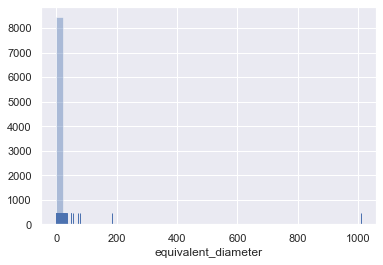

In [11]:
x = imgs['equivalent_diameter'].max(level=1)
sns.distplot(x,kde=False,rug=True);

label       area  convex_area  filled_area  major_axis_length  \
img                                                                    
0   1     11  17.513196    18.543384    17.513196           5.425017   
    2     12   3.433960     3.433960     3.433960           2.344000   
    3     13  25.754700    28.158472    25.754700           8.573289   
    4     14   2.060376     2.060376     2.060376           2.841901   
    5     15  14.422632    15.109424    14.422632           5.513183   

       minor_axis_length  perimeter  equivalent_diameter    extent  img  
img                                                                      
0   1           4.202725  15.319291             4.722128  0.277987    0  
    2           1.845667   5.315646             2.090993  0.214622    0  
    3           3.934785  20.836021             5.726421  0.229953    0  
    4           0.789279   3.758729             1.619677  0.171698    0  
    5           3.543086  14.005104             4.285261  0.267086    0

In [168]:
data_list = []
for i in range(122):
    data_list.append(imgs.loc[i].describe())

           label        area  convex_area  filled_area  major_axis_length  \
count  52.000000   52.000000    52.000000    52.000000          52.000000   
mean   36.500000   31.770734    34.630166    31.770734           6.090733   
std    15.154757   68.022650    74.163946    68.022650           4.680807   
min    11.000000    4.464148     4.807544     4.464148           2.782199   
25%    23.750000   10.559427    11.246219    10.559427           4.131272   
50%    36.500000   12.705652    13.392444    12.705652           4.573792   
75%    49.250000   18.715082    19.745270    18.715082           5.669562   
max    62.000000  337.558268   366.746928   337.558268          29.286600   

       minor_axis_length  perimeter  equivalent_diameter     extent   img  
count          52.000000  52.000000            52.000000  52.000000  52.0  
mean            4.592559  17.270939             5.165877   0.246167   2.0  
std             3.261770  15.088928             3.746383   0.030095   0.0  
mi

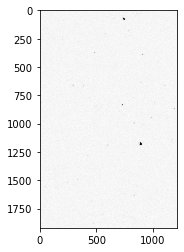

In [171]:
print(data_list[2])
img = cv2.imread('C:/Users/juanr/Documents/mediciones_ZEISS/bandas/Bandanorm/norm_3.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = util.img_as_ubyte(gray)
plt.imshow(gray,cmap='gray')

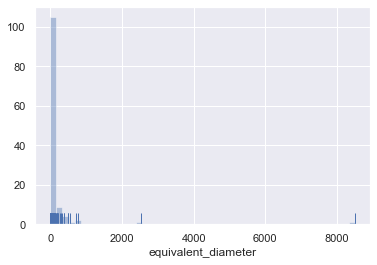

In [41]:
x = imgs['equivalent_diameter'].count(level=0)
sns.distplot(x,kde=False,rug=True);
#plt.xlim(10,3000)

In [27]:
np.max(imgs['equivalent_diameter'].mean(level=0))

1008.9748743793892

In [19]:
imgs.loc[0].max()

area                   271.969632
convex_area            294.977164
filled_area            271.969632
major_axis_length       23.371460
minor_axis_length       15.908802
perimeter               72.234478
equivalent_diameter     18.608667
extent                   0.343396
img                      0.000000
dtype: float64

In [125]:
imgs.iloc[0,1]

17.513196

In [48]:
imgs

[(0,
       label           area    convex_area    filled_area  major_axis_length  \
  0       10  796630.301164  799581.102992  799581.102992        1297.923978   
  1       11      17.513196      18.543384      17.513196           5.425017   
  2       12       3.433960       3.433960       3.433960           2.344000   
  3       13      25.754700      28.158472      25.754700           8.573289   
  4       14       2.060376       2.060376       2.060376           2.841901   
  ..     ...            ...            ...            ...                ...   
  97     107       5.150940       5.494336       5.150940           3.078824   
  98     108       4.807544       5.494336       4.807544           3.229321   
  99     109      89.626356      99.928236      89.626356          13.025072   
  100    110       6.181128       6.524524       6.181128           3.495906   
  101    111       5.150940       5.494336       5.150940           3.205931   
  
       minor_axis_length    peri

In [45]:
imgs =[] 
for img in df.groupby('img'): 
    imgs.append(img)

In [46]:
imgs[0]

(0,
      label           area    convex_area    filled_area  major_axis_length  \
 0       10  796630.301164  799581.102992  799581.102992        1297.923978   
 1       11      17.513196      18.543384      17.513196           5.425017   
 2       12       3.433960       3.433960       3.433960           2.344000   
 3       13      25.754700      28.158472      25.754700           8.573289   
 4       14       2.060376       2.060376       2.060376           2.841901   
 ..     ...            ...            ...            ...                ...   
 97     107       5.150940       5.494336       5.150940           3.078824   
 98     108       4.807544       5.494336       4.807544           3.229321   
 99     109      89.626356      99.928236      89.626356          13.025072   
 100    110       6.181128       6.524524       6.181128           3.495906   
 101    111       5.150940       5.494336       5.150940           3.205931   
 
      minor_axis_length    perimeter  equivale

In [7]:
vsls[0]

,label,area,convex_area,filled_area,major_axis_length,minor_axis_length,perimeter,equivalent_diameter,extent,img
0,10,796630.301164,799581.102992,799581.102992,1297.923978,820.857221,5600.580229,1007.125217,0.342129,0
0,10,798469.186744,799581.102992,799581.102992,1297.760780,821.783329,3982.974225,1008.286935,0.342918,1
0,10,797418.051588,799581.102992,799171.431564,1297.215731,821.227875,4867.028263,1007.623043,0.342467,2
0,10,796601.112504,799581.102992,799488.729468,1296.329499,821.871459,5026.452417,1007.106766,0.342116,3
0,10,797064.010312,799581.102992,799547.793580,1298.032597,821.351387,5345.484557,1007.399334,0.342315,4
...,...,...,...,...,...,...,...,...,...,...
0,10,797419.425172,799581.102992,799581.102992,1297.853127,821.386990,5047.815541,1007.623911,0.342468,118
0,10,795017.713548,799581.102992,799498.687952,1298.561023,821.364740,7149.287495,1006.105358,0.341436,119
0,10,788919.000588,799581.102992,799435.846484,1299.766102,823.120122,10523.869414,1002.238928,0.338817,120
0,10,795895.433724,799581.102992,799581.102992,1297.487588,821.253696,6106.218003,1006.660588,0.341813,121


In [ ]:
for img in range(len(imgs_df)):
    df[img] = imgs_df.get_group(img)

In [ ]:
for groups in imgs_df:
    df[]

#imgs_df.get_group('img_0')

In [2]:
#df = df.set_index('img')
#df.sort_values('column_name',ascending=True)
#imgs = df.groupby(by=['img'])
#for img,imgs in imgs_df:
#    print(img)
#    print(imgs_df.head())

#to plot one against the other:
#sns.pairplot(df, hue='equivalent_diameter');